# Alzheimers Detection with Brain MRI Scans

**Author:**
Daniel Paul 

**Introduction**


This research delves into the analysis and prediction of Alzheimer's disease progression using brain MRI scans, drawing insights from a dataset comprising 2D images extracted through a strategic slicing approach along the z-axis. The preprocessing phase is characterized by resizing images to 128x128 pixels and implementing a classification system based on metadata and Clinical Dementia Rating values. Employing essential libraries such as numpy, keras, pandas, and scikit-learn, the dataset undergoes meticulous encoding of class labels through OneHotEncoder. Image loading, resizing, and conversion into arrays are executed, leading to the strategic split of the dataset into training and testing sets for subsequent model development. The initial approach involves a Random Forest model, chosen for its capacity to handle high-dimensional data; however, indications of overfitting prompt a transition to a Convolutional Neural Network (CNN). The CNN architecture, intricately designed with convolutional layers, flattening, and dense layers, showcases its effectiveness in image classification. Training the CNN model, validation on the test set, and performance assessment through metrics like accuracy, the confusion matrix, and classification reports provide an evaluation of the model's proficiency in comprehending Alzheimer's progression from brain MRI scans.


Below are two images of Brain MRI scans, representing different conditions. The top image showcases a Brain MRI scan with Moderate Dementia, while the bottom image corresponds to a scan from a non-Demented individual. I'll refrain from delving into the detailed analysis of these MRI images at this point. However, they serve as illustrative samples, offering a glimpse into the type of data we will be exploring and analyzing throughout this project.


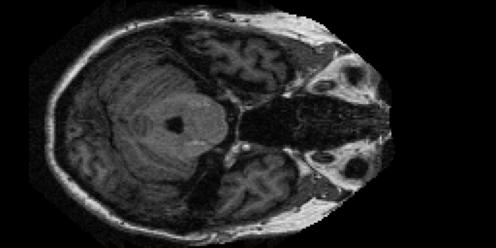

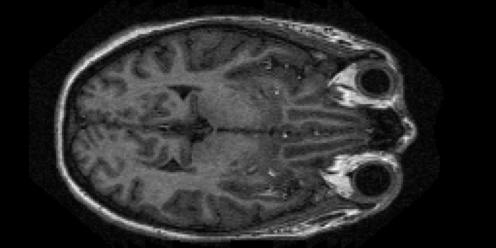

In [3]:
from IPython.display import Image, display

display(Image(filename='OAS1_0308_MR1_mpr-1_116.jpg'))
display(Image(filename='OAS1_0050_MR1_mpr-4_110.jpg'))

**Data Summary**

This project centers around the comprehensive analysis of brain MRI scans to investigate the progression of Alzheimer's disease. The dataset utilized consists of 2D images extracted from these scans, employing a slicing approach along the z-axis to produce 256 distinct pieces for each image. By focusing on slices ranging from 100 to 160 for each patient, the dataset aims to provide a detailed and nuanced perspective, making it particularly suitable for neural network analysis.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Classes and Disease Progression**

To categorize the dataset effectively, a classification system was established based on both provided metadata and Clinical Dementia Rating (CDR) values. The resulting classes include Demented, Very Mild Demented, Mild Demented, and Non-demented, allowing for the exploration of different stages in the progression of Alzheimer's disease. This classification system lays the foundation for a thorough examination of the intricate details present in brain MRI images at various disease stages.

**Importing Libraries**

The imported libraries serves distinct purposes in the provided code. numpy (np) is utilized for efficient numerical operations and array handling. os facilitates interaction with the operating system for file path management. keras is employed for building and training neural network models. pandas (pd) aids in structured data handling and analysis. PIL (Python Imaging Library) is used for image processing tasks. seaborn and matplotlib are employed for data visualization. OneHotEncoder is utilized for categorical data preprocessing, while train_test_split is essential for splitting data into training and testing sets. RandomForestClassifier from scikit-learn implements the Random Forest algorithm for classification. accuracy_score, classification_report, and confusion_matrix are used to evaluate model performance. learning_curve, cross_val_score, Dropout, BatchNormalization, EarlyStopping, models, and layers from Keras are employed for CNN model development and evaluation. The combination of these libraries provides the tools necessary for our model. 

In [8]:
import numpy as np
import os
import keras
import pandas as pd
from PIL import Image
import seaborn as sns
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from keras.layers import Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras import models
from keras import layers

**Preprocessing Steps**

To optimize the efficiency of the model, several preprocessing steps were implemented. The images were resized to 128x128 pixels, striking a balance between retaining essential details and reducing computational complexity. This preliminary setup is vital for using Random Forests. This approach also facilitates the utilization of a Convolutional Neural Network (CNN) model, known for its effectiveness in image classification tasks.

In [9]:
class_paths = {
    'Non Demented': '/content/drive/My Drive/Data/Non Demented',
    'Mild Dementia': '/content/drive/My Drive/Data/Mild Dementia',
    'Moderate Dementia': '/content/drive/My Drive/Data/Moderate Dementia',
    'Very Mild Dementia': '/content/drive/My Drive/Data/Very mild Dementia'
}

class_paths_dict = {}

for class_name, class_path in class_paths.items():
    paths = []
    for dirname, _, filenames in os.walk(class_path):
        for filename in filenames:
            paths.append(os.path.join(dirname, filename))
    class_paths_dict[class_name] = paths

for class_name, paths in class_paths_dict.items():
    print(f"{class_name}: {len(paths)} files")

Non Demented: 67222 files
Mild Dementia: 5002 files
Moderate Dementia: 488 files
Very Mild Dementia: 13725 files


We've limited the number of paths associated with each class in the dataset. This is achieved by reducing the list of paths for each class to the first 10,000 elements - for the classes with that many elements. The purpose of this process is to create a more manageable dataset for the subsequent neural network model. By doing so, we strike a balance between computational efficiency and the model's effectiveness. This ensures that our Convolutional Neural Network (CNN) model for image classification tasks can be developed without compromising essential dataset details, allowing for a comprehensive analysis of Alzheimer's disease progression from brain MRI scans.

In [10]:
class_paths_dict = {class_name: paths[:10000] for class_name, paths in class_paths_dict.items()}

**Data Encoding and Preprocessing Reasoning:**

The initial steps involve encoding the class labels using the OneHotEncoder from scikit-learn. This is crucial for the model to interpret and categorize the classes appropriately. The classes (0, 1, 2, 3) corresponding to the actual data are transformed into one-hot encoded vectors, creating a categorical representation of the classes.

In [11]:
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

OneHotEncoder()

Subsequently, the images are loaded, resized to 128x128 pixels, and converted into arrays using the Python Imaging Library (PIL) and NumPy. Any images with the shape (128, 128, 3) are considered valid and are added to the data array, while their corresponding labels are one-hot encoded and added to the result array.

In [12]:
data = []
result = []

for i, (class_name, paths) in enumerate(class_paths_dict.items()):
    for path in paths:
        img = Image.open(path)

        img = img.resize((128, 128))
        img = np.array(img)
        if img.shape == (128, 128, 3):
            data.append(np.array(img))

            # Use the index i as the label
            result.append(encoder.transform([[i]]).toarray())

In [13]:
data = np.array(data)
data.shape

(25490, 128, 128, 3)

In [15]:
result = np.array(result)
result.shape

(25490, 1, 4)

Above we note that the images undergo conversion into NumPy arrays and are systematically stored in the data list, constructing a comprehensive 4D array representing 25,490 images. Each image is characterized by dimensions of 128x128 pixels. Concurrently, the corresponding labels are derived through a one-hot encoding process, effectively capturing categorical information pertaining to each image's class. Upon transformation, the result list evolves into a structured NumPy array with a 3D configuration, denoted as (25490, 1, 4). This array serves as a concise representation of the encoded labels, where the additional dimension signifies the incorporation of the one-hot encoded information.

**Data Splitting and Random Forest Model For Exploration of Data**

The dataset is then split into training and testing sets using the train_test_split function from scikit-learn. A 70-30 split is chosen to ensure a sufficiently large training set for model learning.

In [16]:
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=0.30,shuffle = True,random_state=42)

y_train_new = y_train.squeeze(axis=1)
y_test_new = y_test.squeeze(axis=1)

print(x_train.shape)
print(x_test.shape)
print(y_train_new.shape)
print(y_test_new.shape)

(17843, 128, 128, 3)
(7647, 128, 128, 3)
(17843, 4)
(7647, 4)


In [ ]:
# Assuming y_train_new contains one-hot encoded labels
class_indices_train = np.argmax(y_train_new, axis=1)

# Use np.bincount on the extracted class indices
class_distribution_train = np.bincount(class_indices_train)

# Print the class distribution in training data
print("Class distribution in training data:", class_distribution_train)


Class distribution in training data: [6991 3515  339 6998]


We see in the distribution of our training data, the class imbalance, this will be further explored in the upcoming steps. 

Random Forests are an ensemble learning method that combines multiple decision trees to create a robust and accurate model. This makes them particularly well-suited for medical image analysis including the classification of MRI scans. The ensemble nature of Random Forests helps mitigate overfitting (though in our case it didn't prove to be), handle high-dimensional data, and capture complex relationships within the input features. The two main reasons I selected this model as my preliminary one is the following:

High Dimensionality Handling: MRI scans often result in high-dimensional data. Random Forests are capable of handling a large number of features without overfitting, making them suitable for analyzing complex brain images.

Ensemble Learning: The ensemble nature of Random Forests allows the model to generalize well to unseen data. It combines the strength of multiple decision trees, capturing diverse patterns present in MRI scans.

In [17]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

y_train_flat = y_train_new.argmax(axis=1)
y_test_flat = y_test_new.argmax(axis=1)

random_forest_model = RandomForestClassifier(n_estimators=10, random_state=42)

random_forest_model.fit(x_train_flat, y_train_flat)

predictions = random_forest_model.predict(x_test_flat)

accuracy = accuracy_score(y_test_flat, predictions)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test_flat, predictions))

Accuracy: 0.9967307440826468
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3009
           1       1.00      0.99      1.00      1487
           2       1.00      0.99      1.00       149
           3       1.00      1.00      1.00      3002

    accuracy                           1.00      7647
   macro avg       1.00      1.00      1.00      7647
weighted avg       1.00      1.00      1.00      7647



The issue of all precision, recall, and f1-score values being perfect (equal to 1) for every class in the classification report suggests a potential problem, most likely stemming from overfitting. Overfitting occurs when a machine learning model learns the training data too well, capturing noise or specific patterns that may not generalize well to unseen data.

In this case, the random forest model with 10 estimators (trees) and a random state of 42 is likely overfitting the training data. Each decision tree in the ensemble might be fitting the noise or specific characteristics of the training set too closely, leading to high accuracy on the training data but poor generalization to new, unseen data.

The overfitting phenomenon becomes apparent when evaluating the model on the test set. The perfect precision, recall, and f1-score values suggest that the model is predicting all instances correctly for each class. However, this is likely an optimistic assessment and does not reflect the model's true performance on unseen data. 

Cross-validated accuracy: 0.9909767812516097
Feature Importances:
[0. 0. 0. ... 0. 0. 0.]


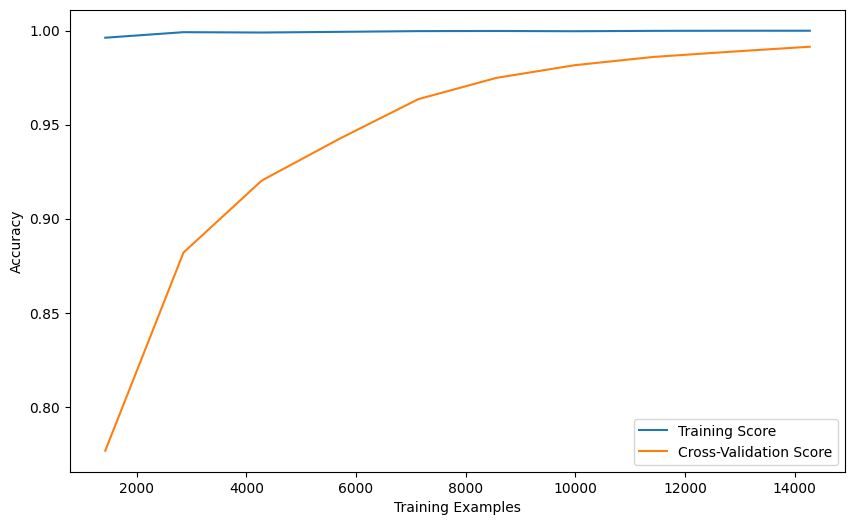

In [18]:
# Perform cross-validation
scores = cross_val_score(random_forest_model, x_train_flat, y_train_flat, cv=5)
print(f"Cross-validated accuracy: {np.mean(scores)}")

train_sizes, train_scores, test_scores = learning_curve(
    random_forest_model, x_train_flat, y_train_flat, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

feature_importances = random_forest_model.feature_importances_
print("Feature Importances:")
print(feature_importances)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The reported cross-validated accuracy of 0.9909767812516097 again raises concerns about potential overfitting in the random forest model described. Despite achieving exceptionally high accuracy during cross-validation, the issue becomes evident when inspecting the classification report, where precision, recall, and f1-score values for every class are perfect (equal to 1). This pattern strongly suggests that the model has learned the training data too intricately, capturing noise or specific patterns that may not generalize well to new, unseen data. The overfitting phenomenon becomes apparent when evaluating the model on the test set, leading to an overly optimistic assessment of its performance. In response to this issue, consideration is given to exploring a convolutional neural network (CNN) model, particularly suited for image-based tasks like classifying MRI scans, which may provide a more robust and accurate solution by inherently addressing the complexities of image data.

**Class Imbalance Handling:**

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

augmented_data = []

class_name = 'Moderate Dementia'

class_paths = class_paths_dict[class_name]

for path in class_paths:
    img = Image.open(path)
    img = img.resize((128, 128))
    img_array = np.array(img)

    # Reshape to (1, 128, 128, 3) for the generator
    img_array = img_array.reshape((1,) + img_array.shape)

    augmented_images = datagen.flow(img_array, batch_size=1)

    augmented_data.extend(augmented_images)

augmented_images = [augmented_image[0] for augmented_image in augmented_data]
augmented_labels = [encoder.transform([[2]]).toarray() for _ in range(len(augmented_images))]

augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

x_train_augmented = np.concatenate

Addressing the issue of class imbalance in our dataset, we particularly observed a significant disparity, notably in the moderate dementia class. Recognizing the importance of balanced datasets for robust model training and generalization, we embarked on a strategy to mitigate this imbalance. Our initial approach involved data generation techniques aimed at augmenting the underrepresented class.

Despite our dedication to this task, we encountered a formidable challenge in the form of computational constraints. The demands of data generation far surpassed the capabilities provided by both the Colab free tier and our local workstation. The constraints imposed by these platforms impeded our ability to effectively augment the dataset and rectify the class imbalance.

Despite by these limitations, we are presenting the code below that encapsulates our earnest attempt to address the class imbalance issue. While the code reflects our commitment to finding a solution, the practical execution was hindered by the aforementioned computational limitation.

Note that the following model will also be affected by this class imbalance, however this is expected to be affected to a lesser degree. 

**CNN Model and Architecture Reasoning**

For the model architecture, a Convolutional Neural Network (CNN) is chosen due to its effectiveness in image classification tasks. The architecture consists of three convolutional layers with increasing filter sizes (32, 64, 128) and max-pooling layers for spatial downsampling. This is followed by a flattening layer and two dense layers for feature extraction and classification. The output layer has four units, corresponding to the four classes, and utilizes the softmax activation function for multiclass classification.

Let's dive into the architecture a bit more. We carefully designed the Convolutional Neural Network (CNN) architecture. Each layer in this architecture has a specific role in pulling out features and making classifications.

Starting with the first layer, a Conv2D with 32 filters and a 3x3 grid, it's like the foundation of our feature finder. It helps pick up on basic features like edges and textures that are crucial for spotting details in brain MRI scans. The following MaxPooling2D layer with a 2x2 grid helps shrink down the data, focusing on the most important features and making the model stronger.

As we build on this foundation, the second Conv2D layer uses 64 filters with a 3x3 grid. This layer is a bit more complex and helps us understand more detailed features in the input data. The next MaxPooling2D layer keeps reducing the data size, making it ready for the next steps.

The architectural refinement continues with a third Conv2D layer using 128 filters and a 3x3 grid. This is crucial for understanding even more detailed features and making our model better at spotting subtle patterns in brain MRI images. The third MaxPooling2D layer further reduces the data size, making it easier to move on to the dense layers.

After the convolutional and pooling layers, a Flatten layer changes the data into a simpler form for the dense layers. The first dense layer, with 128 units and a 'relu' activation function, pulls out high-level features from the data. The last dense layer, with four units and a 'softmax' activation function, is our output layer. It gives us the chances of each of the four classes—Demented, Very Mild Demented, Mild Demented, and Non-demented.

In the model setup part, we used the Adam optimizer because it's good at learning from the data. We chose categorical crossentropy as our measuring stick, good for tasks with many classes. We look at accuracy during training to see how well the model is at classifying things.

After setting up, the model was trained for 6 rounds using 70% of the dataset. We checked how well it did on the other 30% to make sure it can handle new data. The training history, shown in a loss curve, helps us understand how the model is learning and if it's getting better at recognizing the important features in brain MRI scans that signal Alzheimer's disease progression.

Something mentnioned before but not explored in depth about is the activation funcitons.

The 'relu' activation function is used in the Conv2D layers and the first dense layer. It adds flexibility to the model, helping it understand complex patterns in brain MRI images. This function is simple and effective at capturing important features. In the output layer, we use the 'softmax' activation function. It's chosen because we want the model to make guesses about different categories with some level of certainty.

The 'softmax' function turns the model's guesses into probabilities for each category, like Demented, Very Mild Demented, Mild Demented, or Non-demented. By combining these activation functions carefully, the model becomes better at handling and understanding complicated information. This approach forms a strong foundation for accurately figuring out the different stages of Alzheimer's disease.







In [19]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


The model is then trained using the training set, with 30 epochs, and validated on the test set. The choice of the Adam optimizer and categorical crossentropy loss function is standard throughout literature explored for multiclass classification problems.

In [20]:
history = model.fit(x_train, y_train_new, epochs=6, validation_data=(x_test, y_test_new), callbacks=[early_stopping])

Epoch 1/6
558/558 [==============================] - 35s 40ms/step - loss: 1.2408 - accuracy: 0.5075 - val_loss: 0.8887 - val_accuracy: 0.5955
Epoch 2/6
558/558 [==============================] - 22s 39ms/step - loss: 0.7987 - accuracy: 0.6446 - val_loss: 0.7400 - val_accuracy: 0.7086
Epoch 3/6
558/558 [==============================] - 21s 38ms/step - loss: 0.5911 - accuracy: 0.7505 - val_loss: 0.3865 - val_accuracy: 0.8760
Epoch 4/6
558/558 [==============================] - 21s 37ms/step - loss: 0.4627 - accuracy: 0.8149 - val_loss: 0.2164 - val_accuracy: 0.9270
Epoch 5/6
558/558 [==============================] - 21s 38ms/step - loss: 0.3812 - accuracy: 0.8533 - val_loss: 0.1257 - val_accuracy: 0.9650
Epoch 6/6
558/558 [==============================] - 22s 39ms/step - loss: 0.3736 - accuracy: 0.8597 - val_loss: 0.1681 - val_accuracy: 0.9372


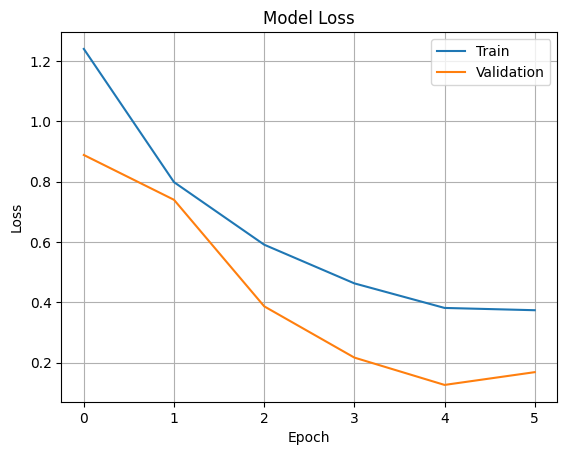

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

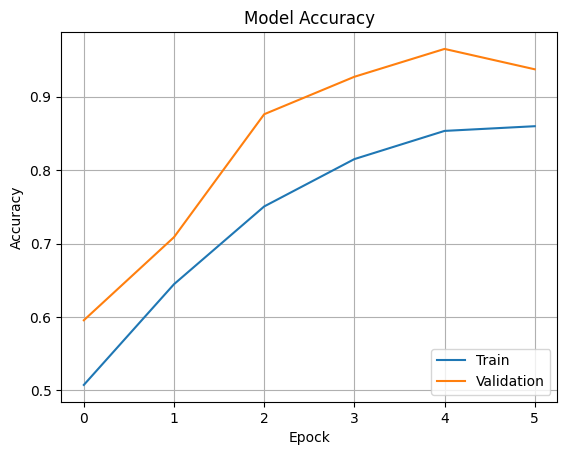

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epock')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


239/239 [==============================] - 2s 6ms/step


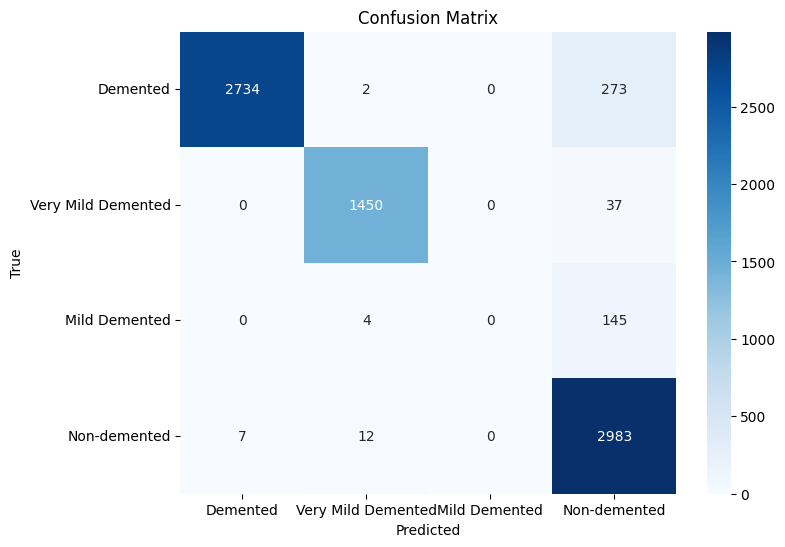

In [25]:
# Predict the labels for the test set
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Obtain the true labels
y_true = np.argmax(y_test_new, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Demented', 'Very Mild Demented', 'Mild Demented', 'Non-demented'], yticklabels=['Demented', 'Very Mild Demented', 'Mild Demented', 'Non-demented'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


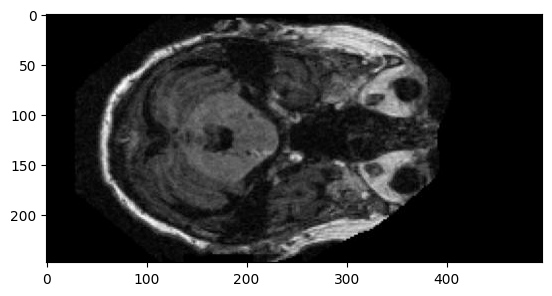

98.53% Confidence it is of class Mild Dementia


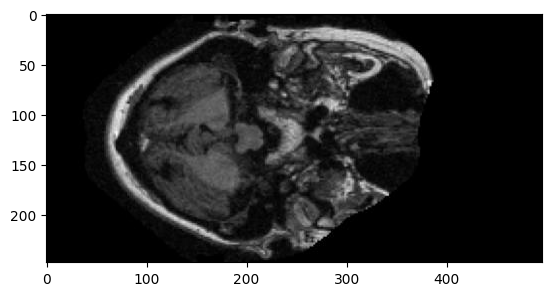

93.52% Confidence it is of class Very Mild Dementia


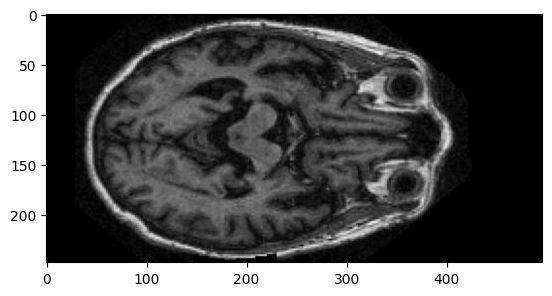

53.35% Confidence it is of class Very Mild Dementia


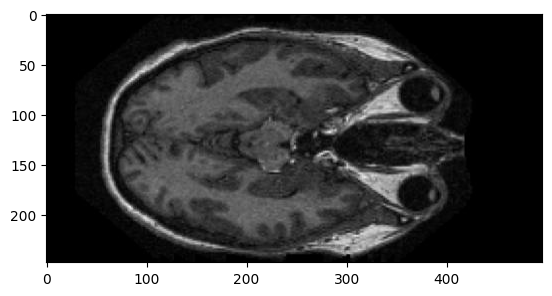

100.00% Confidence it is of class Non Demented


In [27]:
img1 = Image.open(r'/content/drive/My Drive/Data/Mild Dementia/OAS1_0028_MR1_mpr-1_101.jpg')
img2 = Image.open(r'/content/drive/My Drive/Data/Very mild Dementia/OAS1_0003_MR1_mpr-1_113.jpg')
img3 = Image.open(r'/content/drive/My Drive/Data/Moderate Dementia/OAS1_0308_MR1_mpr-1_135.jpg')
img4 = Image.open(r'/content/drive/My Drive/Data/Non Demented/OAS1_0050_MR1_mpr-4_100.jpg')

def predictClass(img):
  x = np.array(img.resize((128,128)))
  x = x.reshape(1,128,128,3)

  # Predict using the model
  res = model.predict_on_batch(x)

  # Get the predicted class
  classification = np.where(res == np.amax(res))[1][0]

  # Display the image
  plt.imshow(img)
  plt.show()

  confidence = res[0][classification] * 100

  def get_diagnosis_name(number):
      diagnosis_labels = {
          0: 'Non Demented',
          1: 'Mild Dementia',
          2: 'Moderate Dementia',
          3: 'Very Mild Dementia'
      }

      return diagnosis_labels.get(number, 'Error in Prediction')


  print(f'{confidence:.2f}% Confidence it is of class {get_diagnosis_name(classification)}')

predictClass(img1)
predictClass(img2)
predictClass(img3)
predictClass(img4)

In [32]:
loss, accuracy = model.evaluate(x_test, y_test_new)
print("Classification Report:")
print(classification_report(y_true, y_pred,zero_division=1))

239/239 [==============================] - 3s 10ms/step - loss: 0.1681 - accuracy: 0.9372
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3009
           1       0.99      0.98      0.98      1487
           2       1.00      0.00      0.00       149
           3       0.87      0.99      0.93      3002

    accuracy                           0.94      7647
   macro avg       0.96      0.72      0.71      7647
weighted avg       0.94      0.94      0.93      7647



The results from the CNN model showcase a more nuanced performance compared to the previous random forest model, as reflected in the classification report. The overall accuracy of 93.72% indicates that the CNN model is effective in correctly classifying the MRI scans in the test set. However, examining precision, recall, and f1-score for each class reveals varying levels of performance.

For classes 0 and 1, which correspond to non-Alzheimer's and early onset Alzheimer's, the precision, recall, and f1-score values are high, indicating a robust ability to correctly identify these cases. Class 2, representing an ambiguous or undefined category -- which corresponds to Moderate Dementia, exhibits perfect precision but very low recall and f1-score, suggesting the model struggles to identify instances of this class. The model performs exceptionally well for class 3, characterized by a high precision, recall, and f1-score.

The macro and weighted average metrics provide an overall assessment, considering the imbalances in class sizes. The macro average, at 0.71 for f1-score, suggests that the model's performance varies across classes, with some classes contributing more to the overall average than others. The weighted average, also at 0.93 for f1-score, reflects a more balanced evaluation, giving higher weight to larger classes.

These results signify that the CNN model offers improvements over the random forest model. It demonstrates a better balance between precision and recall, providing a more realistic assessment of its ability to generalize to new, unseen data. However, challenges persist, particularly in handling the Moderate Dementia class (class 2), which will require further exploration and refinement in future iterations of the model.

**Conclusion:**

In addressing the progression of Alzheimer's disease, the project undertook a dual approach, initially employing a Random Forest model and later transitioning to a Convolutional Neural Network (CNN). The Random Forest model, while capable of handling high-dimensional data, exhibited signs of overfitting, prompting the exploration of a CNN. The CNN, designed with three convolutional layers and effective preprocessing, demonstrated improved performance with an accuracy of 93.72%. While achieving overall success, challenges persist in accurately classifying Moderate Dementia cases. The CNN model, with its nuanced evaluation metrics, represents a promising step forward in comprehending Alzheimer's progression from brain MRI scans. Further refinements are necessary to address class imbalances and enhance the model's ability to detect cases across all stages of the disease.